In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [4]:
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 10

In [5]:
with open(r"Path for file") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [6]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

In [7]:
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [8]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [13]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
fit = True

if fit == True:
    #model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
    model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
    model.load_weights('/data/facial_expression_model_weights.h5') #load weights

Epoch 1/10
 80/256 [========>.....................] - ETA: 7:25:36 - loss: 0.7788 - acc: 0.7140

In [20]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.7464453172291736
Train accuracy: 72.62530913692295
Test loss: 1.2344939922615492
Test accuracy: 57.34187796375618


In [40]:
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):

    objects = ('angry', 'disgust', 'fear', 'sad', 'happy', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
    tk=np.argmax(emotions) 
    return tk

In [41]:
model.save("navya.h5")


In [42]:
from keras.models import load_model
model=load_model("navya.h5")

In [43]:
monitor_testset_results = False

if monitor_testset_results == True:
    #make predictions for test set
    predictions = model.predict(x_test)

    index = 0
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores
            
            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);
            
            plt.gray()
            plt.imshow(testing_img)
            plt.show()
            
            print(i)
            
            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1

In [ ]:
import cv2
video_capture = cv2.VideoCapture(0)
# Check success
if not video_capture.isOpened():
    raise Exception("Could not open video device")
# Read picture. ret === True on success
ret, frame = video_capture.read()
# Close device
video_capture.release()
import sys
from matplotlib import pyplot as plt
frameRGB = frame[:,:,::-1] # BGR => RGB
img=cv2.resize(frameRGB, (48,48))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
custom = model.predict(x)
k=emotion_analysis(custom[0])
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
plt.gray()
plt.imshow(x)
plt.show()

In [82]:
if(k==0 or k==1 or k==2 or k==3):
    print("Ads are not displayed")
else:
    print("Ads are displayed")

Ads are not displayed


In [68]:
from imageai.Prediction import ImagePrediction
import matplotlib.pyplot as plt
prediction = ImagePrediction()

prediction.setModelTypeAsDenseNet()
prediction.setModelPath("Path for Densenet model")
prediction.loadModel()

from imageai.Detection import ObjectDetection
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath('Path for yolo v5 model')
detector.loadModel()


from imageai.Prediction import ImagePrediction
import os
execution_path = os.getcwd()
prediction = ImagePrediction()
prediction.setModelTypeAsDenseNet()
prediction.setModelPath(os.path.join(execution_path, "Path for model"))
prediction.loadModel()

Enter the input image path:C:/Users/Naga Sri Navya/Desktop/testn/11.jpg
Enter the output image path:C:/Users/Naga Sri Navya/Desktop/testn/11n.jpg
cellular_telephone  :  25.715026259422302
modem  :  21.533340215682983
iPod  :  12.51170039176941
remote_control  :  9.710345417261124
desktop_computer  :  8.767782151699066
hand-held_computer  :  6.330259144306183
screen  :  2.80177965760231
lighter  :  2.7238674461841583
printer  :  1.6403578221797943
monitor  :  1.2981584295630455


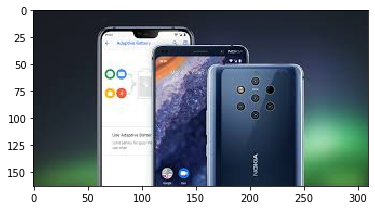

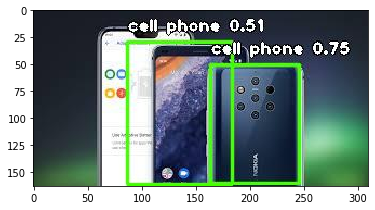

Enter 0 to stop else enter 1:0


In [73]:
import os
c=1
n=0
j=0
input_p=[]
output_p=[]
detections=[]
predictions,probabilities=[],[]
while True:
    input_p.append(input('Enter the input image path:'))
    output_p.append(input('Enter the output image path:'))
    detections.append(detector.detectObjectsFromImage(input_image=input_p[j], output_image_path=output_p[j], minimum_percentage_probability=30))
    temp= prediction.predictImage(os.path.join(execution_path,input_p[j]), result_count=10)
    predictions.append(temp[0])
    probabilities.append(temp[1])
    for eachPrediction, eachProbability in zip(predictions[j], probabilities[j]):
        print(eachPrediction," : ", eachProbability)
    inputim=plt.imread(input_p[j])
    plt.imshow(inputim)
    plt.show()
    output=plt.imread(output_p[j])
    plt.imshow(output)
    plt.show()
    c=input('Enter 0 to stop else enter 1:')
    if int(c)==0:
        break
    j+=1

In [74]:
a=[]   
n=len(detections)
print("Number of searches made:")
n

Number of searches made:


1

In [75]:
for j in range (n):    
    for i in detections[j]:
       a.append(i['name'])
print("History:")
a

History:


['cell phone', 'cell phone']

In [76]:
mode=max(set(a), key = a.count)
print('Next search is likely to be of the category:',mode)

Next search is likely to be of the category: cell phone


In [77]:
try: 
    from googlesearch import search 
except ImportError: 
    print("No module named 'google' found") 

# to search 
query = mode
print('Top ten google webresults of the category:',mode)
for j in search(query, tld="co.in", num=10, stop=10, pause=4): 
    print(j) 


Top ten google webresults of the category: cell phone
https://en.wikipedia.org/wiki/Mobile_phone
https://en.wikipedia.org/wiki/Cell_Phone_(film)
https://en.wikipedia.org/wiki/Mobile_phone_operator
https://en.wikipedia.org/wiki/Mobile_phone_features
https://en.wikipedia.org/wiki/Prepaid_mobile_phone
https://www.amazon.in/mobile-phones/b?ie=UTF8&node=1389401031
https://www.amazon.in/mobile-phone-accessories/b?ie=UTF8&node=1389402031
https://www.amazon.in/OnePlus-Mirror-Black-128GB-Storage/dp/B07DJD1Y3Q
https://www.amazon.in/Redmi-Black-3GB-32GB-Storage/dp/B077Q7F7Z3
https://www.amazon.in/Test-Exclusive-736/dp/B07DJ8K2YQ


Ads you may like:


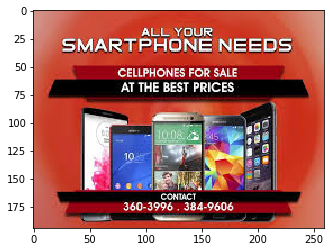

In [84]:
st="Path for saved ads"+mode+".jpg"
if(k!=0 or k!=1 or k!=2 or k!=3):
    print("Ads you may like:")
    ads=plt.imread(st)
    plt.imshow(ads)
    plt.show()
else:
    print("NO ads!")
    
    